## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly.**

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
#Answer to part 1

df=pd.read_csv("ab_data.csv") #reads the data from the file
df.head()#prints the first 5 rows


,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [3]:
#Answer to part b
df.shape# prints a tuple (#of_rows,#of_columns)

(294478, 5)

c. The number of unique users in the dataset.

In [4]:
#answer to part c
df["user_id"].nunique()

290584

d. The proportion of users converted.

In [5]:
#answer to part d
(df["converted"]==1).mean() #1=converted,0=not converted

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't match.

In [6]:
#answer to part e

mask1=df["group"]=="treatment"
mask2=df["group"]=="control"
sum(df[mask1]["landing_page"]=="old_page")+sum(df[mask2]["landing_page"]=="new_page")

3893

f. Do any of the rows have missing values?

In [7]:
#answer to part f

df.isna().sum() 
#prints the number of nulls in each column. There are no nulls. 
#See the output of the code below

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [8]:
#Answer to part a
mask1=(df["group"]=="treatment")&(df["landing_page"]=="old_page")
mask2=(df["group"]=="control")&(df["landing_page"]=="new_page")
mask=~(mask1|mask2)#Remove the rows where the group does not match the 
#landing_page
df2=df[mask]

In [9]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [10]:
#answer to part a
df2["user_id"].nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [11]:
#answer to part b
rep_id=df2["user_id"].duplicated()==True
df2[rep_id]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

In [12]:
#Anwer to part c

df2[rep_id] #information for the duplicated row

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [13]:
#Answer to part d
non_rep_id=df2["user_id"].duplicated()==False
df2=df2[non_rep_id]

`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [14]:
#Answer to part a
p_conv=(df2["converted"]==1).mean()#computes the conversion probability
p_conv

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [15]:
#Answer to part b
(df2[df2["group"]=="control"]["converted"]==1).mean() #computes 
#P(converted=1/group=control)

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [16]:
#Answer to part c
(df2[df2["group"]=="treatment"]["converted"]==1).mean()#computes 
#P(converted=1/group=treatment)

0.11880806551510564

d. What is the probability that an individual received the new page?

In [17]:
#Answer to part d
(df2.landing_page=="new_page").mean()

0.5000619442226688

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

**Answer to e:** Although no statistical test has been performed yet, we can see that there is no sufficient evidence to conclude the new page will lead to more conversions. This can be viewed from the fact that the proportion of people converted under the new page does not differ much from the proprtion of people converted under the old page. Even if it turns out that it is statistically significant, there is no practical significance. At the end of the day, we will have to talk to our supervisor in order to determine what he/she considers the output to be practically significant. 

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**Answer to 1.**
$$H_{\text{o}}: p_{old}\geq p_{new} \hspace{0.5cm} H_{1}:p_{old}< p_{new}$$

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [18]:
#Answer to part a

#Under null hypothesis pnew=pold=p_conv=conversion probability independent of page
p_new=(df2["converted"]==1).mean()
p_new

0.11959708724499628

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [19]:
#Answer to part b

#As mentioned before, pold=pnew under H0
p_old=(df2["converted"]==1).mean()
p_old

0.11959708724499628

c. What is $n_{new}$, the number of individuals in the treatment group?

In [20]:
#Answer to c

n_new=(df2["group"]=="treatment").sum()
n_new

145310

d. What is $n_{old}$, the number of individuals in the control group?

In [21]:
#Answer to d

n_old=(df2["group"]=="control").sum()
n_old

145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [22]:
#Answer to part e

new_page_converted=np.random.choice(2,n_new,p_new)#Here pnew is under H0

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [23]:
#Answer to part f

old_page_converted=np.random.choice(2,n_old,p_old)#Here p_old is under H0

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [24]:
#Answer to part g

p_new_simul=np.mean(new_page_converted==1)
p_old_simul=np.mean(old_page_converted==1)
p_new_simul-p_old_simul

0.0010875181256281286

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [25]:
#Answeer to part h

p_diffs=[]
for _ in range(10000):
    new_page_converted=np.random.choice(2,n_new,p_new)
    old_page_converted=np.random.choice(2,n_old,p_old)
    p_new_simul=np.mean(new_page_converted==1)
    p_old_simul=np.mean(old_page_converted==1)
    p_diffs.append(p_new_simul-p_old_simul)
    

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

Text(0, 0.5, 'frequency')

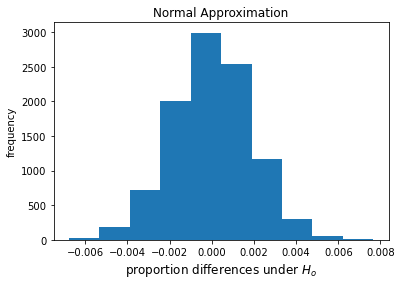

In [26]:
#Answer to i.

plt.hist(p_diffs); #Creates histogram
plt.title("Normal Approximation") #sets a title
plt.xlabel("proportion differences under $H_{o}$",fontsize=12) #sets the label on the x-axis
plt.ylabel("frequency")# sets the label on the y-axis

**Description of the above picture**
Acccording to the above picture, the simulated proportion differences follow a normal distribution, i.e the sampling distribution is normal. We expected this fact and it can be justified by the Central Limit Theorem. Also the approximation is quite good since the sample sizes  `n_new` and `n_old` are quite big.

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [27]:
#Answer to j

act_diff=(df2.query('group=="treatment"')["converted"]==1).mean()-(df2.query('group=="control"')["converted"]==1).mean()
p_value=np.mean(p_diffs>act_diff)
print("The p-value is",p_value)


The p-value is 0.8054


k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**Answer to k.** We just computed the `p-value`. At the level of significance $\alpha=0.05$, `p_value` is greater than the level of significance $\alpha$. This iimplies that based on our current data, we fail to reject the null hypothesis. As a result, a difference between the new and old pages is not statistically significant.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [28]:
#Answer to i.
import statsmodels.api as sm
from statsmodels.stats.proportion import proportions_ztest

convert_old = df2.query('group=="control"')["converted"] # first group
convert_new = df2.query('group=="treatment"')["converted"]# second group

n_old = convert_old.shape[0] # #of people in the first group (old page)
n_new = convert_new.shape[0]# #of people in the second group (new page)

count=np.array([(convert_old==1).sum(),(convert_new==1).sum()]) # number 
# of successes (number of 1's) in each group

nobs=np.array([n_old,n_new]) #Put number of peaple in each group 
#in the array nobs




m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [29]:
print("The p-value is equal to",proportions_ztest(count[::-1],nobs[::-1],alternative="larger")[1]) #Note that 
#the p_value from z_test is almost eqall to the p_value from our simulation

proportions_ztest(count[::-1],nobs[::-1],alternative="larger") #prints the 
#z-statistic and the p-value

The p-value is equal to 0.9050583127590245


(-1.3109241984234394, 0.9050583127590245)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**Answer to n.** The `z-score` is equal to $11.31$ and it is the value of our statistic (metric) evaluated at our given samples anf the `p_value` is equal to `0.90`. At the level of significance $\alpha=0.05$ `p-value` is larger than $\alpha$ (or equivallently $\text{z_score}=-1.31<1.645$, where 1.645=$\text{z}_{0.95}$), we fail to reject the null hypothesis since `p-value` is larger than $\alpha=0.05$. This means that any observed difference in `p_old` and `p_new` is due to chance and it is not statistically significant. The `p_value` found from `ztest` is approximately equal to the simulated `p_value` found in part j. In addition, we reached the same conclusion using the simulated `p_value`.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Answer to part a.** Since our response variable `y=df2["converted"]` is 
a categorical variable with two levels/categories, we have a classifcation problem.

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [30]:
#Answer to part b

df2["intercept"]=1#adds the intercept

df2["ab_page"]=pd.get_dummies(df2["group"])["treatment"]#Createas  ab_page
#column with treatment=1 and control=0

df2["treatment_page"]=pd.get_dummies(df2["landing_page"])["new_page"] 
#Creates the new column called treatment_page where 1 is for the new_page 
#and 0 otherwise

c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [31]:
#Answer to part c and b

#instantiate the model
model=sm.Logit(df2["converted"],df2[["intercept","ab_page"]])

#fit the model
res=model.fit()


Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [32]:
#print the summary
res.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.000      
Dependent Variable: converted        AIC:              212780.3502
Date:               2021-07-30 21:15 BIC:              212801.5095
No. Observations:   290584           Log-Likelihood:   -1.0639e+05
Df Model:           1                LL-Null:          -1.0639e+05
Df Residuals:       290582           LLR p-value:      0.18988    
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074
==================================================================

"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

**Answer to e.** The `p-value` associated with __`ab_page`__ is $0.1899$ (check the table above). It is related to the folowing hypothesis
$$H_{o}: b_{1}=0 \hspace{0.5cm} H_{1}: b_{1}\neq 0,$$ where $b_1$ is the coefficient in front of __`ab_page`__ in our logistic regression model.
At the level of significance $\alpha=0.05$, we fail to reject the null hyposthesis which means that we do not have enough evidence that the independent variable __`ab_page`__ is associated (correlated) with the conversion probability. On the other hand, the `p-value` found in Part II is associated with the following hypothesis
$$H_{\text{o}}: p_{old}\geq p_{new} \hspace{0.5cm} H_{1}:p_{old}< p_{new}$$ and the $z$ statistic, metric, used for this hypothesis is different from the one (t-statistic) used to check the hypothesis regarding the coefficient $b_1$. In other words, the sampling distribution of each statistic was different.

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Answer to f.** As we can see from `p-value` of $F$-statistic,printed in the summary, the variables included in the logistic model are not associated with the conversion probability $p$ (their association is not statistically significant). As a result, this fact will affect the prediction power of the model. (of course it depends on the metric you use) To increase the prediction power (need to decide on the metric that will be used for this purpose), it is good to include more variables which are associated  (correlated) with the conversion probability $p$. However, including more and more variables or high order terms does not necesserilly lead to the improvement of the model. There is a chance that we could overfit our model (to do very well on our train data) and as a result it does poorly on the unseen data. To deal with these issues we need to use cross validation and tunning model techniques and this path will not be taken here.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

**Answer to part g.**

In [33]:
#We call the dataframe containing the countries by df_countries
df_countries=pd.read_csv("countries.csv")

#we merge df_countries and df2 (from part I) into df_marged
df_merged=df2.merge(df_countries,how="inner",on="user_id")
df_merged.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,treatment_page,country
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,0,US
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,0,US
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,1,US
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,1,US
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,0,US


In [34]:
#Create three columns US,CA, UK (in the model use only 2) for our 
#dummy variables CA, US, UK
df_merged[["CA","UK","US"]]=pd.get_dummies(df_merged["country"])

#included additional columns "US" and "CA" in our column
model=sm.Logit(df_merged["converted"],df_merged[["intercept","ab_page","US","CA"]])

res=model.fit() #fits the model
res.summary2()#prints the summmary

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.000      
Dependent Variable: converted        AIC:              212781.1253
Date:               2021-07-30 21:15 BIC:              212823.4439
No. Observations:   290584           Log-Likelihood:   -1.0639e+05
Df Model:           3                LL-Null:          -1.0639e+05
Df Residuals:       290580           LLR p-value:      0.17599    
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9794    0.0127  -155.4145  0.0000  -2.0044  -1.9544
ab_page      -0.0149    0.0114    -1.3069  0.1912  -0.0374   0.0075
US           -0.0099    0.0133    -0.7433  0.4573  -0.0359   0.0162
CA           -0.0506    0.0284    -1.7835  0.0745  -0.1063   0.0050
==================================================================

"""

According to the above table (summary), even when we added a new variable our model seems not to be improving (for example adjusted $R^2=0$ and the association of our variables are not statistically significant with the conversion probability as the `p-value` of the $F$-statistic suggests).

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

**Answer to part h.**

In [35]:
#Create interactions
df_merged["interact_CA"]=df_merged["CA"]*df_merged["ab_page"]
df_merged["interact_US"]=df_merged["US"]*df_merged["ab_page"]
df_merged["interact_UK"]=df_merged["UK"]*df_merged["ab_page"]


In [36]:
#Use statsmodels to create a new model
model=sm.Logit(df_merged["converted"],df_merged[["intercept","ab_page","US","CA","interact_CA","interact_US"]])
res=model.fit() #fits themodel
res.summary2()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.000      
Dependent Variable: converted        AIC:              212782.6602
Date:               2021-07-30 21:15 BIC:              212846.1381
No. Observations:   290584           Log-Likelihood:   -1.0639e+05
Df Model:           5                LL-Null:          -1.0639e+05
Df Residuals:       290578           LLR p-value:      0.19199    
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9922    0.0161  -123.4571  0.0000  -2.0238  -1.9606
ab_page       0.0108    0.0228     0.4749  0.6349  -0.0339   0.0555
US            0.0057    0.0188     0.3057  0.7598  -0.0311   0.0426
CA           -0.0118    0.0398    -0.2957  0.7674  -0.0899   0.0663
interact_CA  -0.0783    0.0568    -1.3783  0.1681  -0.1896   0.0330
interact_US  -0.0314    0.0266    -1.1807  0.2377  -0.0835   0.0207
==================================================================

"""

Even adding the interactions to the model, it seems not to be improving. As result,
based on the $F$-statistic, the correlation of our variables with the conversion probability is not statistically significant. As a result we do not have enough evidence to conclude that the conversion probaility will be increased under the new page no matter whether it is launched in US, Canada or UK.

**Note:** $F$-statistic is used for the folloing hypothesis

$H_{o}: \text{all the coefficients in the model are equal to zero}$

$H_{1}: \text{at least one of them is not equal to zero}$

At the level of significanve $\alpha=0.05$, we fail to reject the above 
null hypothesis as the above summary table suggests.

<a id='conclusions'></a>
## Finishing Up

> Congratulations!  You have reached the end of the A/B Test Results project!  You should be very proud of all you have accomplished!



## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!